#**Wind Turbine Failure Prediction using a Multi Layer Percepton Model**

##**PROBELM STATEMENT:**
Using the provided wind turbine dataset, develop a predictive maintenance model to forecast potential generator failures. The goal is to utilize historical sensor data (with over 40 features) to estimate the likelihood of a future failure, allowing for proactive, scheduled maintenance to be performed on the turbines.

##**IMPORTING NECCESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import kagglehub
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import pickle as pkl
import streamlit as st
import shutil
import os

##**DATASET DETAILS**
**Dataset Name**: ReneWind: Wind Turbine Predictive Maintenance

**Source**: [DATASET DOWNLOAD LINK](https://www.kaggle.com/datasets/mariyamalshatta/renewind)

**File Format**: .csv

#### Dataset Description
The ReneWind dataset contains sensor data from wind turbines, recorded to predict potential generator failures. It consists of 40 numerical features capturing operational parameters and a binary target variable, Target. The dataset is divided into two separate files, Train.csv and Test.csv, each with an associated Target label.

##**DOWNLOADING DATASET**

In [5]:
path = kagglehub.dataset_download("mariyamalshatta/renewind")

print("Path to dataset files:", path)
destination_path =os.path.join(os.getcwd(),"Data")
os.makedirs(destination_path, exist_ok=True)

for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(destination_path, item)
    shutil.move(s, d)

print(f"Dataset moved from cache to {destination_path}")

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\mariyamalshatta\renewind\versions\1
Dataset moved from cache to C:\Users\USER\OneDrive\Desktop\proj1\Data


##**DATAFRAME CONVERSION AND PREPROCESSING AND FEATURE SELECTION**



In [8]:
train_df = pd.read_csv(os.path.join(destination_path,'Train.csv'))
test_df = pd.read_csv(os.path.join(destination_path,'Test.csv'))
X_train = train_df.drop('Target', axis=1)
y_train = train_df['Target']
X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']
X_train.isnull().sum()
missing_value_medians = X_train.median()
X_train_imputed = X_train.fillna(missing_value_medians)
X_test_imputed = X_test.fillna(missing_value_medians)
X_train_imputed.isnull().sum()
k_features = 20
selector = SelectKBest(score_func=f_classif, k=k_features)
X_train_selected = selector.fit_transform(X_train_imputed, y_train)
X_test_selected = selector.transform(X_test_imputed)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_selected))
X_test_scaled = pd.DataFrame(scaler.transform(X_test_selected))

[np.int64(18890), np.int64(1110)]


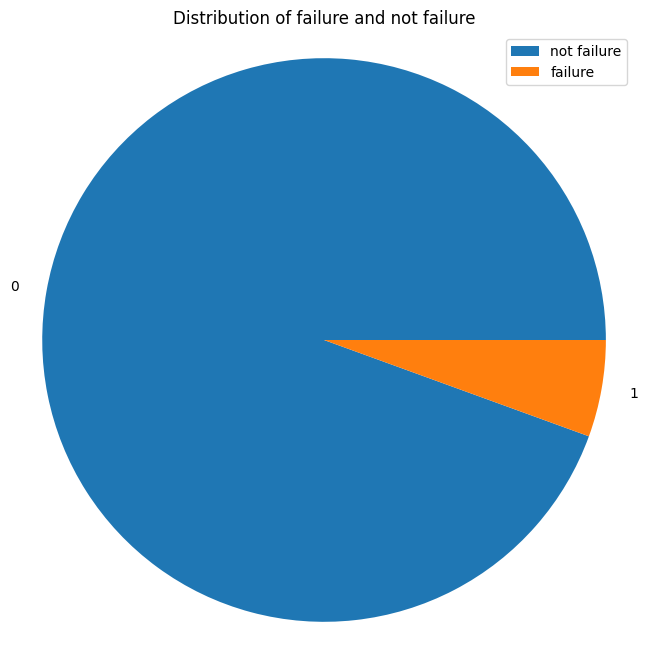

In [9]:
count=[train_df[train_df['Target']==0]['Target'].count(),train_df[train_df['Target']== 1]['Target'].count()]
print(count)
l=[0,1]
plt.figure(figsize=(8,8))
plt.pie(count, labels=l)
plt.title('Distribution of failure and not failure')
plt.legend(labels=["not failure","failure"])
plt.axis('equal')
plt.show()

[np.int64(18890), np.int64(18890)]


(np.float64(-1.1), np.float64(1.1), np.float64(-1.1), np.float64(1.1))

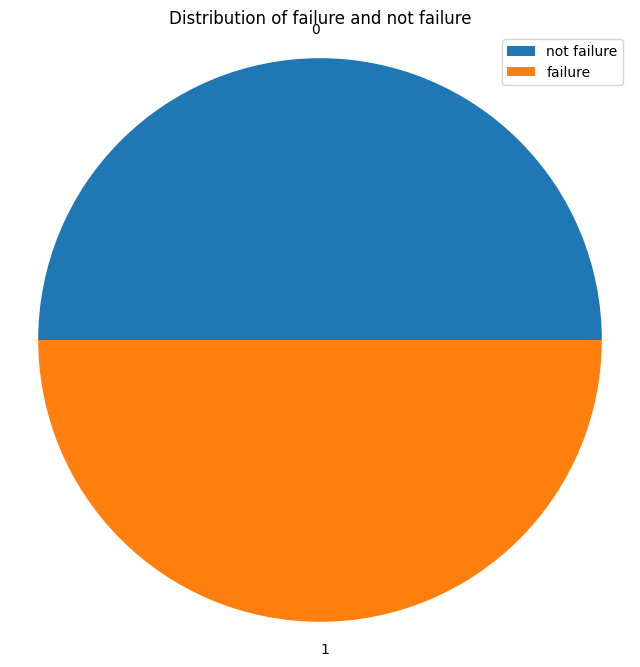

In [10]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
count=[y_resampled[y_resampled==0].count(),y_resampled[y_resampled== 1].count()]
print(count)
labels=[0,1]
plt.figure(figsize=(8,8))
plt.pie(count, labels=labels)
plt.title('Distribution of failure and not failure')
plt.legend(labels=["not failure","failure"])
plt.axis('equal')

#**SELECTED MODEL FOR THIS**
##A Multilayer Perceptron (MLP) is a type of feedforward artificial neural network that can be effectively used for classification tasks. It is particularly well-suited for problems where the relationship between input features and target classes is non-linear and complex.

#**MODEL TRAINING**

In [ ]:
n_features = X_train_selected.shape[1]
model = keras.Sequential([
    keras.Input(shape=(n_features,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\nTraining Neural Network...")
model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, verbose=1)
print("Model training complete.")


Training Neural Network...
Epoch 1/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9111 - loss: 0.2540
Epoch 2/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9454 - loss: 0.1632
Epoch 3/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1406
Epoch 4/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9533 - loss: 0.1305
Epoch 5/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9553 - loss: 0.1210
Epoch 6/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9564 - loss: 0.1158
Epoch 7/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9574 - loss: 0.1115
Epoch 8/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9602 - loss: 0.1060
Epoch 9/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9598 - loss: 0.1026
Epoch 10/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9621 - loss: 0.0991
Epoch 11/50
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9626 - loss: 0.0966
Ep

#**MODEL EVALUTION USING THE TEST SET**

In [11]:
y_pred_proba = model.predict(X_test_scaled).flatten()
y_pred_hard = (y_pred_proba > 0.5).astype(int)

print("\n--- Final Model Performance on the Test Set FOR EVALUTION ---")
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_hard))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_hard)
print(cm)

NameError: name 'model' is not defined

#**SAVING THE MODEL FOR FUTURE DEPLOYMENT**


In [ ]:
model.save('MLP_model.keras')
print("Model saved to 'MLP_model.keras'")

Model saved to 'MLP_model.keras'


In [ ]:
with open('medians.pkl', 'wb') as f:
    pkl.dump(missing_value_medians, f)
print("Median values saved to 'medians.pkl'")

with open('selector.pkl', 'wb') as f:
    pkl.dump(selector, f)
print("Feature selector saved to 'selector.pkl'")

with open('scaler.pkl', 'wb') as f:
    pkl.dump(scaler, f)
print("Scaler saved to 'scaler.pkl'")

Median values saved to 'medians.pkl'
Feature selector saved to 'selector.pkl'
Scaler saved to 'scaler.pkl'
